## Denoising Autoencoder
### Remove noise from MNIST digits using Autoencoder
Reference/Study Material: 

https://blog.keras.io/building-autoencoders-in-keras.html
https://keras.io/examples/mnist_denoising_autoencoder/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import (Input, Dense)

# Load data
from keras.datasets import mnist


Using TensorFlow backend.


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28                          
input_shape = (img_rows * img_cols, )

# the data, shuffled and split between train and test sets
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [3]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train.shape[0], ' train samples')
print(x_test.shape[0], ' test samples')

60000  train samples
10000  test samples


In [4]:
def AE(features_shape):

    # Input
    x = Input(name='inputs', shape=features_shape, dtype='float32')
    o = x
    
    # Encoder
    enc = Dense(32, activation='relu', name='encoder')(o)
    
    # Decoder
    dec = Dense(features_shape[0], activation='sigmoid', name='decoder')(enc)
    
    # Print network summary
    Model(inputs=x, outputs=dec).summary()
    
    return Model(inputs=x, outputs=dec)

In [5]:
batch_size = 128
epochs = 40

autoenc = AE(input_shape)
autoenc.compile(optimizer='adadelta', loss='binary_crossentropy')

autoenc.fit(x_train_noisy, x_train, epochs=epochs, batch_size=batch_size,
            shuffle=True, validation_data=(x_test_noisy, x_test))

decoded_imgs = autoenc.predict(x_test_noisy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 784)               0         
_________________________________________________________________
encoder (Dense)              (None, 32)                25120     
_________________________________________________________________
decoder (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 4s 74us/step - loss: 0.2964 - val_loss: 0.2637
Epoch 2/40
60000/60000 [==============================] - 4s 61us/step - loss: 0.2566 - val_loss: 0.2450
Epoch 3/40
60000/60000 [==============================] - 3s 55us/step - loss: 0.2340 - val_loss: 0.2211
Epoch 4/40
60000/60000 [=============

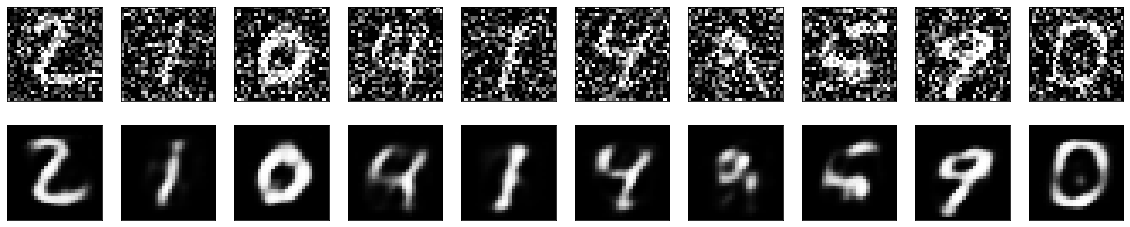

In [6]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()